In [26]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [27]:
np.random.seed(0)

In [28]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

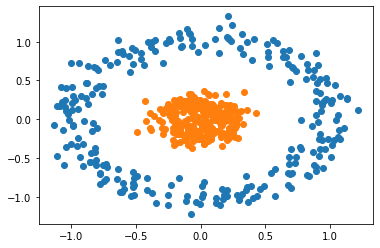

In [29]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [30]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [31]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 940us/step - loss: 0.7054 - accuracy: 0.4760
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5920
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.6780
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4540
Epoch 5/100
25/25 [==============================] - 0s 997us/step - loss: 0.6892 - accuracy: 0.6880
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.6020
Epoch 7/100
25/25 [==============================] - 0s 838us/step - loss: 0.6854 - accuracy: 0.6120
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5620
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.8260
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.7020
Epo

Text(0.5, 1.0, 'accuracy')

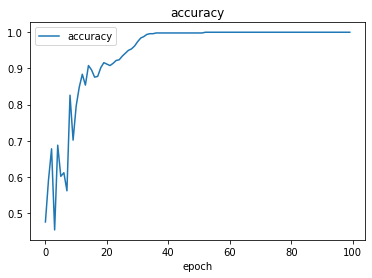

In [32]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

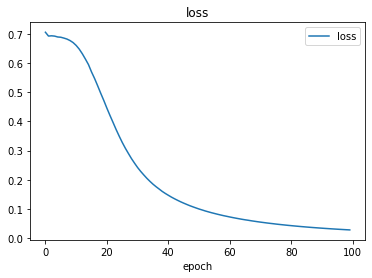

In [33]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [39]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

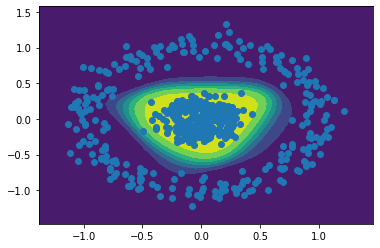

In [38]:
plot_decision_boundary(X, y, model)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is:  [[0.9886004]]


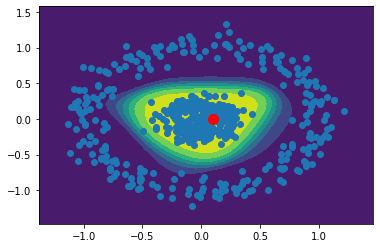

In [42]:
plot_decision_boundary(X, y, model)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)